In [51]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [52]:
data = pd.read_csv(r"C:/Users/Triloki-Gupta/ML_DL/Preprocessing/train.csv")
print(data.shape)
data.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Univariate Selection/ Chi-Squared


The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [54]:
X = data.drop(["price_range"], axis=1)
y = data.price_range

In [55]:
bestFeatures = SelectKBest(score_func=chi2, k=10)
fit = bestFeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [56]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(10,'Score'))

         Features          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


### Tree based

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we can use Extra Tree Classifier for extracting the top 10 features for the dataset.

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [58]:
model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_

array([0.05997512, 0.01885722, 0.03193587, 0.01564249, 0.02951637,
       0.01482913, 0.03451015, 0.03083038, 0.03385829, 0.02984782,
       0.03086039, 0.05217151, 0.04966068, 0.42875576, 0.0312954 ,
       0.03160333, 0.03198232, 0.01083159, 0.01538165, 0.01765452])

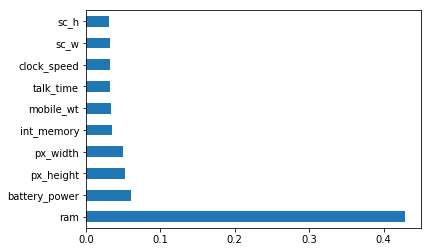

In [59]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix

Correlation states how the features are related to each other or the target variable.
Correlation can be positive or negative.

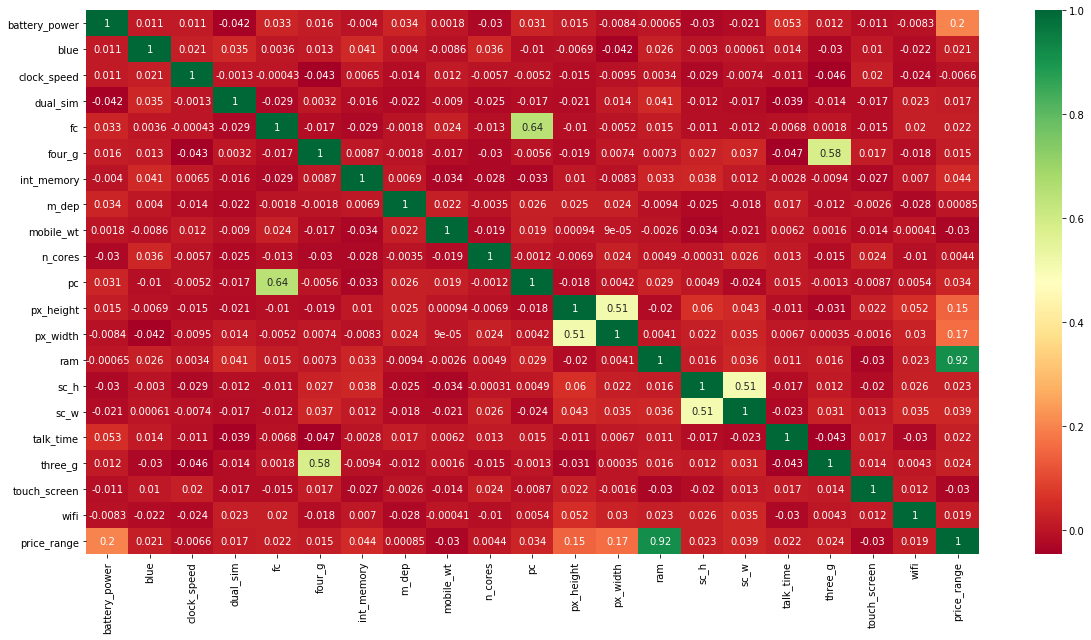

In [60]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

### Recursive Feature Elimination

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef attribute or through a _feature__importances_ attribute.

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [63]:
#In this case, we use RandomForestClassifier , and the RFE observes the feature_importances_
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
rfe_feature

Fitting estimator with 20 features.


['battery_power',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_w',
 'talk_time']

In [64]:
#In this case, we use LogisticRegression , and the RFE observes the coef_
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
rfe_feature

Fitting estimator with 20 features.


['blue',
 'clock_speed',
 'dual_sim',
 'four_g',
 'm_dep',
 'n_cores',
 'sc_h',
 'three_g',
 'touch_screen',
 'wifi']

### Lasso: SelectFromModel

In [65]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [66]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=10)
embeded_lr_selector.fit(X, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
embeded_lr_feature

['blue',
 'clock_speed',
 'dual_sim',
 'four_g',
 'm_dep',
 'n_cores',
 'sc_h',
 'three_g',
 'touch_screen',
 'wifi']